# Red Wine Quality 
## By Ariana Hibbard
### Last Edited: May 6, 2020

I am performing an exploratory analysis of the red wine quality dataset. My goal is to get a general summary and overview of the dataset and to surface any interesting features of the dataset.

This project is primarily to get some practice using numpy and pandas, and use them to produce an interesting exploration of a dataset. 

## About the dataset
This dataset has a variety of features that describe the quality of red wine samples. The dataset has 1599 rows and contains 12 attributes which are described in the section of this notebook called **Exploratory Analysis of Red Wine Quality**. Of the 12 attributes, 11 attributes are input variables that describe the physical qualities of the wine (e.g. PH values) and the output is a wine quality rating between 0 (very bad) and 10 (very excellent). The quality was determined by. a median of at least 3 evaluations made by wine experts. Each expert graded the wine quality between 0 (very bad) and 10 (very excellent). There are a lot more normal-rated wines in this dataset than wines rated excellent or poor.

A link to a summary of information about the data set used can be found here: https://archive.ics.uci.edu/ml/datasets/wine+quality

The link to download the datasets can be found here: https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/.

## Citation
P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. 
  Modeling wine preferences by data mining from physicochemical properties.
  In Decision Support Systems, Elsevier, 47(4):547-553. ISSN: 0167-9236.

# Preprocessing the Dataset
# Exploratory Analysis of Red Wine Quality

The data set has 12 variables. The variables are:
* fixed acidity
    * Fixed acidity relates to acids in wines that do not evaporate readily. 
* volatile acidity
    * This refers to the acids in a wine that are gaseous, rather than liquid. This means that they can be sensed as smell. [Source](https://www.decanter.com/learn/volatile-acidity-va-45532/). At lower levels, volatile acidity can give wine a sweet, fruity smell (like cherry, raspberry and passion fruit) but too much volatile acidity can cause wine to go bad and it can smell like nail polish remover or vinegar. [Source](https://winefolly.com/deep-dive/weird-wine-flavors-and-the-science-behind-them/). 
* citric acid
    * Citric acid is often added in wines to increase acidity or complement a specific flavor. Too much citric acid can contribute to increased volatile acidity. [Source](https://wineserver.ucdavis.edu/industry-info/enology/methods-and-techniques/common-chemical-reagents/citric-acid)
* residual sugar
    * Residual sugar is form the natural grape sugars that are leftover in a wine after the alcoholic fermentation finishes. It affects the sweetness of the wine. [Source](https://winefolly.com/deep-dive/what-is-residual-sugar-in-wine/)
* chlorides
    * Chlorides have been cited as a potential compound found in certain wines that may give wines a salty flavor. [Source](https://www.scielo.br/scielo.php?script=sci_arttext&pid=S0101-20612015000100095) 
* free sulfur dioxide
    * Aids in preventing microbial growth and the oxidation of wine. [Source](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3472855/) Too much free sulfur dioxide can mask a wine's fruit aromas [Source](https://www.extension.iastate.edu/wine/total-sulfur-dioxide-why-it-matters-too). 
* total sulfur dioxide
    * Represents the portion of sulfur dioxide that is free in wine and also bound to other chemicals in the wine such as aldehydes, pigments , or sugars. [Source](https://www.extension.iastate.edu/wine/total-sulfur-dioxide-why-it-matters-too). 
* density
    * Density is the mass per volume of a wine. The density of wine can be measured using various techniques as described by this [article](https://www.awri.com.au/industry_support/winemaking_resources/laboratory_methods/chemical/density/). 
* pH
* sulphates
* alcohol
* quality

In [1]:
import numpy as np
import pandas as pd

# load in the data
wine_data = pd.read_csv('winequality-red.csv',sep=';')

num_rows = len(wine_data.index)
print("Number of instances: ", num_rows)

Number of instances:  1599


The lines of code above are used to import numpy and pandas and read in the red wine quality dataset for processing. They also calculate the number of rows available in the dataset. There are 1599 rows. 

The following is a summary of the quality column. The quality column describes what rating in quality a wine has been given by various wine reviewers. For each row in the dataset, the quality provided is an average of the quality ratings from at least 3 wine reviewers. In the dataset, the wine quality only occurs as integers. 

In [2]:
'''
Displays a simple table describing the summary of the given attribute columns.
params
 dataset: Pandas DataFrame that contains the dataset
 attribute: String containing the name of the attribute
'''
def display_attribute_summary(dataset,attribute):
    print(attribute, "summary")
    print("----------------------")
    print(dataset[attribute].describe())
    print()
    
display_attribute_summary(wine_data,"quality")

quality summary
----------------------
count    1599.000000
mean        5.636023
std         0.807569
min         3.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         8.000000
Name: quality, dtype: float64



The mean wine quality is 5.636. This quality makes sense for the given dataset because the dataset abstract provided by UCI stated that "normal" qualities for wine were more common than qualities that were poor or excellent. This is also reflected in the min and max values found in the dataset, 3 and 8 respectively. The range of qualities for red wine is relatively small in comparison to the potential values (0 through 10). This perhaps indiciates that wine reviewers were less likely to rate a wine as "very bad" or "excellent" and may have tended to stay close to average ratings for wine. 

The following lines of code create some summaries for other variables in the wine data set. The summaries I chose to include were: fixed acidity, volatile acidity, citric acid, and total sulfur dioxide summary. I chose these summaries because I identified them as physical properties of wine that may affect the overall taste. 

Acids can contribute greatly to the taste of a wine [according to this article from UCI](https://waterhouse.ucdavis.edu/whats-in-wine/fixed-acidity). According to UCI, wines lacking in acidity are considered "flat". The acidity of the wine may affect the quality and taste. I also chose to display the free sulfur dioxide summary because according to [this article](https://www.extension.iastate.edu/wine/total-sulfur-dioxide-why-it-matters-too), too much free sulfur dioxide may actually affect the taste of wine to the consumer. 

In [3]:
display_attribute_summary(wine_data,"fixed acidity")
display_attribute_summary(wine_data,"volatile acidity")
display_attribute_summary(wine_data,"citric acid")
display_attribute_summary(wine_data,"pH")
display_attribute_summary(wine_data,"free sulfur dioxide")

fixed acidity summary
----------------------
count    1599.000000
mean        8.319637
std         1.741096
min         4.600000
25%         7.100000
50%         7.900000
75%         9.200000
max        15.900000
Name: fixed acidity, dtype: float64

volatile acidity summary
----------------------
count    1599.000000
mean        0.527821
std         0.179060
min         0.120000
25%         0.390000
50%         0.520000
75%         0.640000
max         1.580000
Name: volatile acidity, dtype: float64

citric acid summary
----------------------
count    1599.000000
mean        0.270976
std         0.194801
min         0.000000
25%         0.090000
50%         0.260000
75%         0.420000
max         1.000000
Name: citric acid, dtype: float64

pH summary
----------------------
count    1599.000000
mean        3.311113
std         0.154386
min         2.740000
25%         3.210000
50%         3.310000
75%         3.400000
max         4.010000
Name: pH, dtype: float64

free sulfur dioxide 

The following functions below create groups to plot the count of wines organized by quality values. Since the quality values are discrete values, I chose a bar chart to show the number of wines with each given rating.

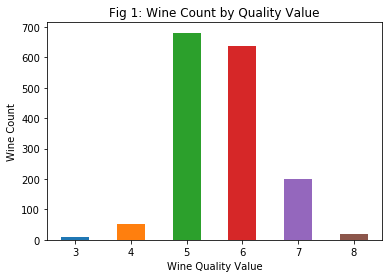

In [8]:
# calculating number of wines with each rating
import matplotlib.pyplot as plt

'''
Gets number of wines with each quality value and returns a series with quality value and counts.
No params
'''
def get_wine_count_by_quality():
    num_wines_by_quality = {}

    # choose range 3 to 8 for the qualities in the wine
    for i in range(3,9):
        # check if the row has the current quality value
        qual_series_obj = wine_data.apply(lambda x: True if x['quality'] == i else False, axis=1)
    
        # get the number of rows with quality value = i
        num_of_rows = len(wine_data[qual_series_obj == True].index)
        num_wines_by_quality[i] = num_of_rows

    num_wines_by_quality_series = pd.Series(num_wines_by_quality)
    return num_wines_by_quality_series

'''
Plots the number of wines with a particular value rating. 
No params
'''
def plot_wine_count_by_quality():
    wine_count_by_quality_ser = get_wine_count_by_quality()
    ax = wine_count_by_quality_ser.plot.bar(rot=0)
    plt.title("Fig 1: Wine Count by Quality Value")
    plt.xlabel("Wine Quality Value")
    plt.ylabel("Wine Count")
    #plt.close()

plot_wine_count_by_quality()

Figure 1 shows the wine count by quality value. The quality value can be any value between 0 and 10, but the min and max recorded were 3 and 8, as shown in the summary of the quality column. The most frequent quality values were 5 and 6, which also makes sense with the calculated mean and median for wine quality. One can see that 5, 6, and 7 were the most popular ratings. There were not many values within 3 and 8, so as stated in the abstract for a dataset, an interesting task might be to apply a machine learning algorithm to identify outliers in the dataset. 

The following function 

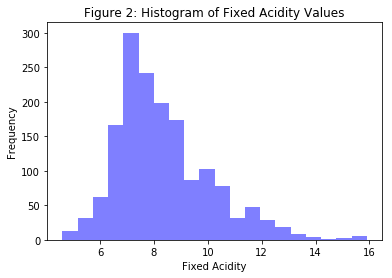

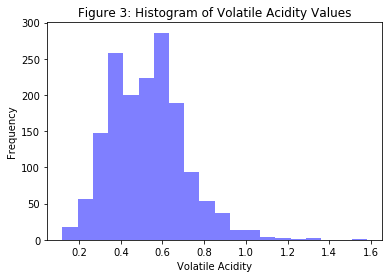

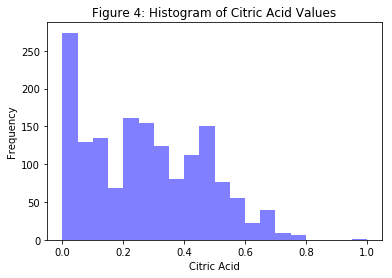

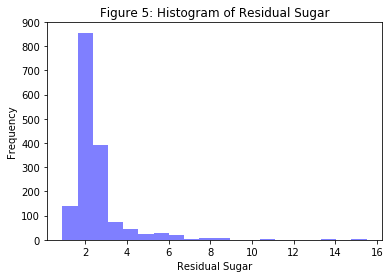

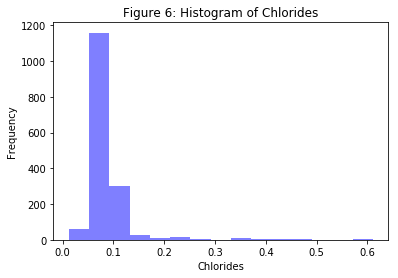

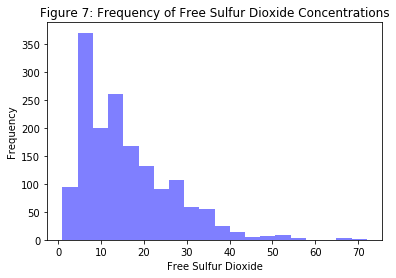

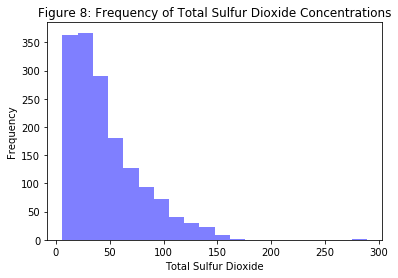

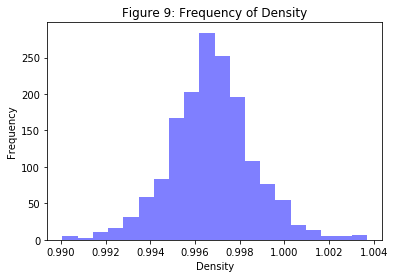

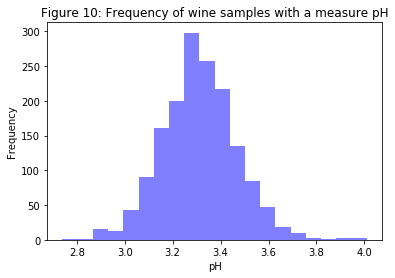

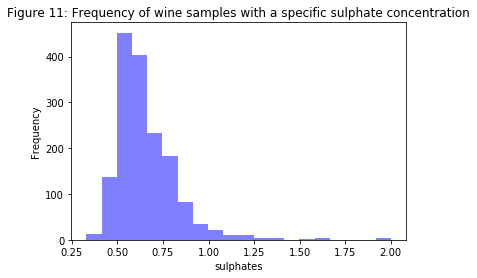

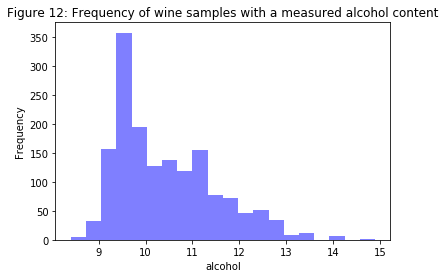

In [5]:
'''
Plots a histogram for a given dataset.
params
 num_bins: integer number of bins for the histogram chart
 dataset: pandas DataFrame containing the dataset
 x_label: string for the label that should go on the x-axis
 y_label: string for the label on the y-axis
 title: string describing the title of the plot
'''
def plot_histogram(num_bins,dataset,x_label,y_label,title):
    # the histogram of the data
    n, bins, patches = plt.hist(dataset, num_bins, facecolor='blue', alpha=0.5)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()

plot_histogram(20,wine_data["fixed acidity"],"Fixed Acidity","Frequency","Figure 2: Histogram of Fixed Acidity Values")
plot_histogram(20,wine_data["volatile acidity"],"Volatile Acidity","Frequency","Figure 3: Histogram of Volatile Acidity Values")
plot_histogram(20,wine_data["citric acid"],"Citric Acid","Frequency","Figure 4: Histogram of Citric Acid Values")
plot_histogram(20,wine_data["residual sugar"], "Residual Sugar", "Frequency", "Figure 5: Histogram of Residual Sugar")
plot_histogram(15,wine_data["chlorides"], "Chlorides", "Frequency", "Figure 6: Histogram of Chlorides")
plot_histogram(20,wine_data["free sulfur dioxide"],"Free Sulfur Dioxide", "Frequency", "Figure 7: Frequency of Free Sulfur Dioxide Concentrations")
plot_histogram(20,wine_data["total sulfur dioxide"],"Total Sulfur Dioxide","Frequency","Figure 8: Frequency of Total Sulfur Dioxide Concentrations")
plot_histogram(20,wine_data["density"],"Density","Frequency","Figure 9: Frequency of Density")
plot_histogram(20,wine_data["pH"],"pH","Frequency","Figure 10: Frequency of wine samples with a measure pH")
plot_histogram(20,wine_data["sulphates"],"sulphates","Frequency","Figure 11: Frequency of wine samples with a specific sulphate concentration")
plot_histogram(20,wine_data["alcohol"],"alcohol","Frequency","Figure 12: Frequency of wine samples with a measured alcohol content")

As stated previously, the acidity of a wine can contribute to the overall taste of the wine, 
and hence the quality of the wine. Figure 2 shows the overall distribution of values for the fixed acidity of wine. 

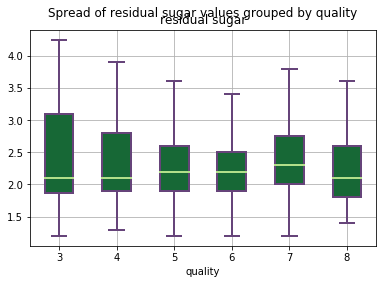

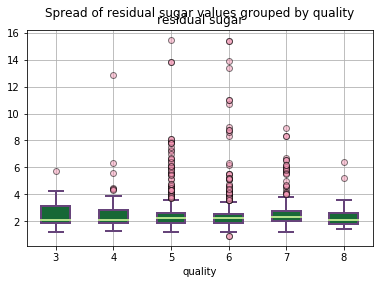

In [6]:
def draw_box_whisker_plot(df,column_prop,group_by_prop,showfliers):
    bp = df.boxplot(column=column_prop,by=group_by_prop, patch_artist=True,return_type='dict',showfliers=showfliers)

    # hide the grouped by title
    plt.suptitle("Spread of residual sugar values grouped by quality")
    for key in bp.keys():
        # change outline color
        [box.set(color='#66447a',linewidth=2) for box in bp[key]['boxes']]
        # change fill color
        [box.set(facecolor='#176836') for box in bp[key]['boxes']]
        # change whisker color
        [whisker.set(color='#66447a', linewidth=2) for whisker in bp[key]['whiskers']]
        # change cap color
        [cap.set(color='#66447a', linewidth=2) for cap in bp[key]['caps']]
        # change median line color
        [median.set(color='#b2df8a', linewidth=2) for median in bp[key]['medians']]
        
        # set outlier flier color
        [flier.set(marker='o', markerfacecolor='#f596b5', alpha=0.5) for flier in bp[key]['fliers']]
        
        
draw_box_whisker_plot(wine_data,['residual sugar'],'quality',False)
draw_box_whisker_plot(wine_data,['residual sugar'],'quality',True)

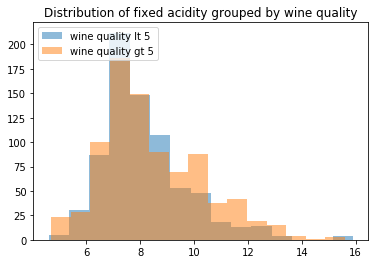

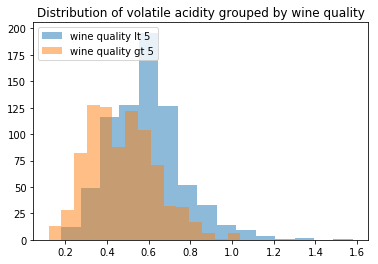

In [7]:
def plot_two_histograms(attribute,bins):
    # object. to check if the quality is greater than 5
    quality_gt_5 = wine_data.apply(lambda x: True if x['quality'] > 5 else False, axis=1)

    quality_lt_5 = wine_data.apply(lambda x: True if x['quality'] <= 5 else False, axis=1)
    
    a = wine_data[quality_lt_5 == True]
    b = wine_data[quality_gt_5 == True]
    #bins = np.linspace(-10, 20, 50)
    
    plt.hist(a[attribute], bins, alpha = 0.5, label='wine quality lt 5')
    plt.hist(b[attribute], bins, alpha = 0.5, label='wine quality gt 5')
    plt.legend(loc='upper left')
    title = "Distribution of " + attribute + " grouped by wine quality"
    plt.title(title)
    plt.show()

plot_two_histograms("fixed acidity", 15)
plot_two_histograms("volatile acidity", 15)